In [3]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array=cv2.imread("Training/0/Training_426842.jpg")

In [3]:
img_array.shape

(48, 48, 3)

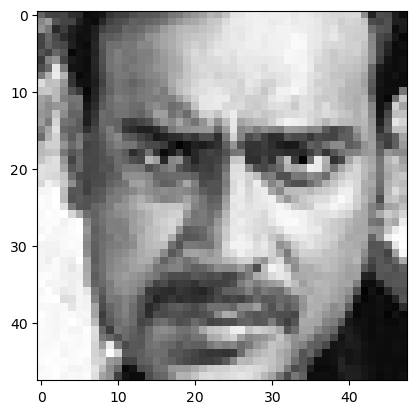

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory="Training/"

In [6]:
Classes=["0","1","2","3","4","5","6"]

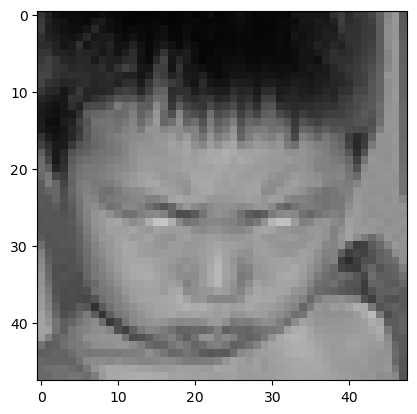

In [7]:
#Reading all the images

for category in Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

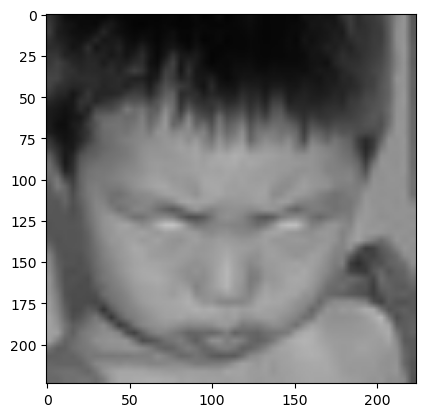

In [8]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

# Read all the images and convert them to array and storing in training_Data

In [10]:
training_Data=[]

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
                
        

In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

12994


In [13]:
import random
random.shuffle(training_Data)

In [14]:
X=[]  #features
y=[]  #Labels

for features,labels in training_Data:
    X.append(features)
    y.append(labels)
    
X=np.array(X).reshape(-1,img_size,img_size,3) #Converting to 4 dimensional as MobileNet uses 4 dimesional images

In [15]:
X.shape

(12994, 224, 224, 3)

In [16]:
#Normalize the data

X=X/255.0;

In [17]:
Y=np.array(y)

In [18]:
Y.shape

(12994,)

# Deep Learning Model for Training using Transfer Learning

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model=tf.keras.applications.MobileNetV2()  #Pre-trained Model

In [21]:
 model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

# Transfer Learning- Tuning , Weights will start from last check point

In [22]:
base_input=model.layers[0].input
base_output=model.layers[-2].output  #We need the output from 2nd last layer and use it for our last layer which has 7 classes

In [23]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [24]:
final_output=layers.Dense(128)(base_output)   #adding new layer after the output of global pooling layer
final_output=layers.Activation("relu")(final_output) #activation function
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation("relu")(final_output)
final_output=layers.Dense(7,activation="softmax")(final_output) #my classes are seven

In [25]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [26]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [27]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam",metrics=["accuracy"])

In [28]:
new_model.fit(X,Y,epochs=3)

Epoch 1/3
407/407 [==============================] - 2334s 6s/step - loss: 1.4283 - accuracy: 0.4376
Epoch 2/3
407/407 [==============================] - 4158s 10s/step - loss: 1.2290 - accuracy: 0.5326
Epoch 3/3
407/407 [==============================] - 2262s 6s/step - loss: 1.1384 - accuracy: 0.5661


In [29]:
new_model.save('Final_model.h5')

C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
frame=cv2.imread('happy boy.jpg')

In [9]:
frame.shape

(124, 124, 3)

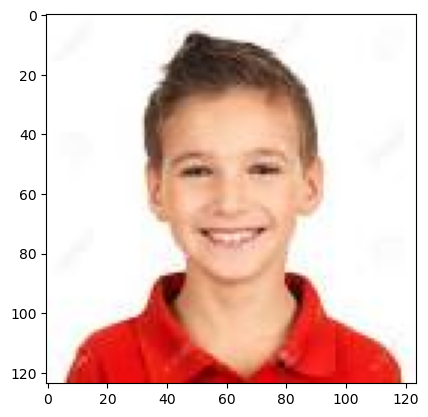

In [10]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [11]:
# We need frontal face detection algorithm (gray image) so we use haarcascade


In [12]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [13]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [14]:
gray.shape

(124, 124)

In [15]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi=roi_color[ey:ey+eh,ex:ex+ew]

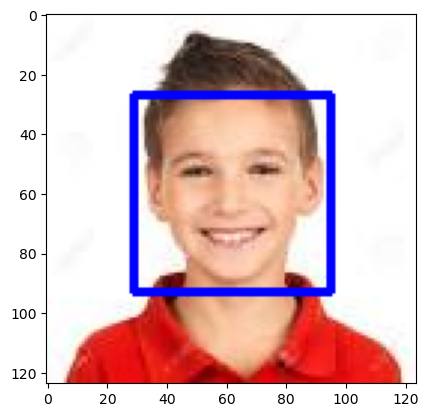

In [16]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [17]:
new_model=tf.keras.models.load_model('Final_model.h5')

In [71]:
new_model.fit(X,Y,epochs=2)

Epoch 1/2
407/407 [==============================] - 2304s 5s/step - loss: 1.0667 - accuracy: 0.5905
Epoch 2/2
407/407 [==============================] - 2240s 6s/step - loss: 1.0007 - accuracy: 0.6209


In [73]:
new_model.save('Final_model.h5')

In [114]:
new_model=tf.keras.models.load_model('Final_model.h5')

In [115]:
new_model.fit(X,Y,epochs=3)

Epoch 1/3
407/407 [==============================] - 2420s 6s/step - loss: 0.9374 - accuracy: 0.6489
Epoch 2/3
407/407 [==============================] - 2342s 6s/step - loss: 0.8612 - accuracy: 0.6804
Epoch 3/3
407/407 [==============================] - 2331s 6s/step - loss: 0.7998 - accuracy: 0.7039


In [116]:
new_model=tf.keras.models.load_model('Final_model.h5')

In [117]:
new_model=tf.keras.models.load_model('Final_model.h5')

In [ ]:
score=new_model.evaluate(X,Y,verbose=False)

In [5]:
new_model=tf.keras.models.load_model('Final_model.h5')

In [18]:
final_image =cv2.resize(face_roi, (224, 224))
final_image= np.expand_dims (final_image, axis =0) ## need fourth dimension
final_image=final_image/255.0


In [19]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 3s 3s/step


In [20]:
np.argmax (Predictions)

0

In [26]:
Predictions

array([[8.3088350e-01, 5.8546234e-06, 1.9022817e-02, 2.9625595e-04,
        1.1254240e-01, 3.6664039e-02, 5.8510451e-04]], dtype=float32)